# 6.4 자전거 대여 수요 예측 경진대회 베이스라인 모델

- 베이스라인 모델(baseline model)이란 뼈대가 되는 가장 기본적인 모델을 의미
- 베이스라인에서 출발해 성능을 점차 향상하는 방향으로 모델링
- 사이킷런이 제공하는 기본 선형 회귀 모델을 베이스라인으로 사용할 계획
- 전체 프로세스는 다음과 같음
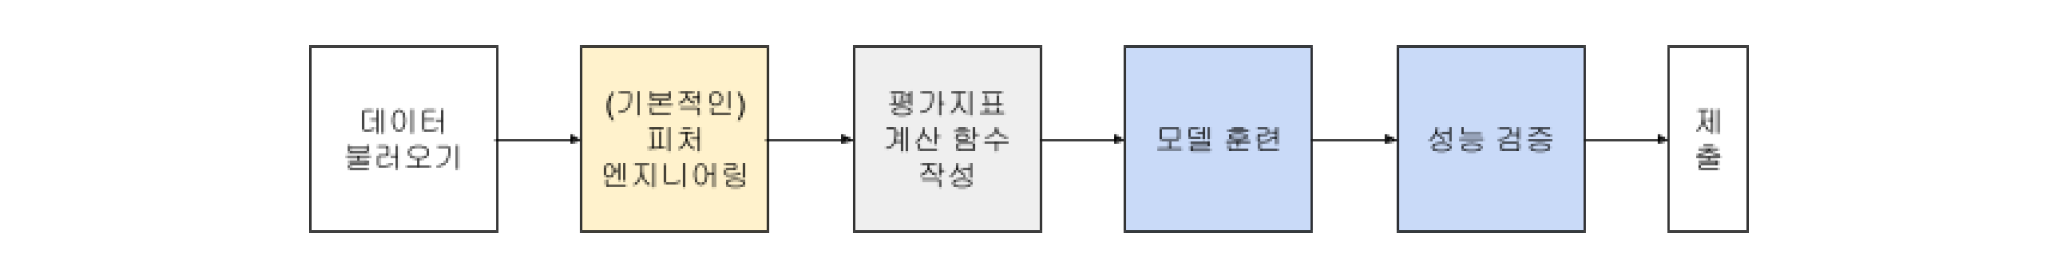

In [2]:
import pandas as pd
# 데이터 경로
data_path = 'C:\\vscode\\kaggle\\dataset\\bike-sharing-demand_dat\\'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

## 6.4.1 피처 엔지니어링
- 피처 엔지니어링은 데이터를 변환하는 작업
- 피처 엔지니어링은 훈련, 테스트 데이터에 모두 적용해야 함
- 따라서 피처 엔지니어링 전에 두 데이터를 합쳤다가 다 끝나면 도로 나눠줘야 함
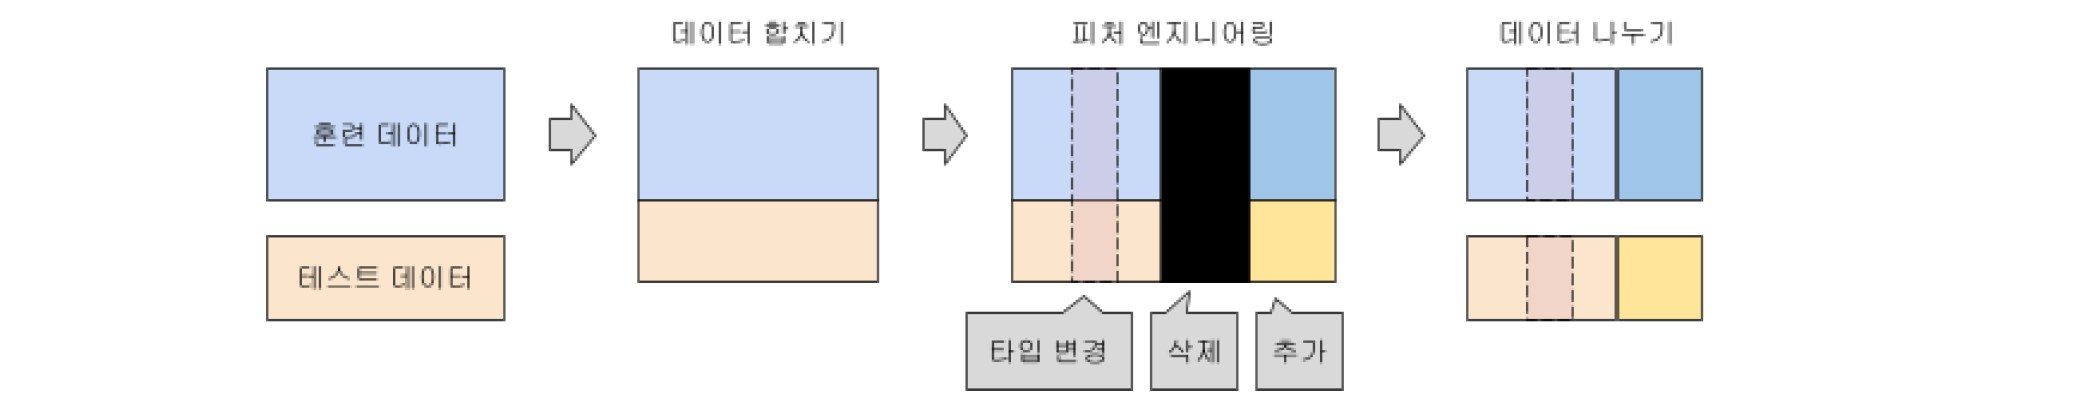

### 이상치 제거
- 데이터 합치기 전에 이상치 먼저 제거
#### **<font color='orange'> weather == 4인 데이터 제거</font>**

In [7]:
# 훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] != 4]

In [5]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### 데이터 합치기
- 훈련 데이터와 테스트 데이터에 같은 피처 엔지니어링을 적용하기 위해 두 데이터를 하나로 합침 concat

In [8]:
len(train) + len(test)

17378

In [9]:
all_data_temp = pd.concat([train, test])
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [11]:
all_data = pd.concat([train, test], ignore_index=True) # ignore_index=True 0부터 끝까지 순차로 인덱스 할당 
all_data
# registered  count -> 두변수 test set에 없음 / count는 타겟값임 


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


### 파생 변수(피처) 추가
- 탐색적 데이터 분석에서 다룬 피처 엔지니어링을 비슷한 방식으로 적용   
#### **<font color='orange'> 연도, 월, 시간, 요일 피처 추가</font>**

In [12]:
all_data['datetime'] = pd.to_datetime(all_data['datetime']) # datetime 타입으로 바꾸기

all_data['year'] = all_data['datetime'].dt.year         # 연도
all_data['month'] = all_data['datetime'].dt.month       # 월
all_data['hour'] = all_data['datetime'].dt.hour         # 시간
all_data['weekday'] = all_data['datetime'].dt.weekday   # 요일 (day_name 요일은 문자열로, weekday는 숫자로 반환)

# 자전거 예측 도움이 되는 피처만 생성 / 나머지 피처는 그대로 둠 


#### **<font color='orange'> day, minute, second 피처는 생성하지 않음</font>**

### 필요 없는 피처 제거
#### **<font color='orange'> casual, registered 피처 제거</font>**
#### **<font color='orange'> datetime 피처 제거</font>**
#### **<font color='orange'> month 피처 제거</font>**
#### **<font color='orange'> windspeed 피처 제거</font>**

In [13]:
drop_features = ['casual', 'registered', 'datetime', 'month', 'windspeed']

all_data = all_data.drop(drop_features, axis=1)

# 예측성능 높이려면 타겟값과 관련있는 피처 골라내기가 필요함 

- 탐색적 데이터 분석에서 얻은 인사이트를 활용해 의미 있는 피처와 불필요한 피처를 구분(피처 선택)
 - 피처가 많다고 무조건 좋은 게 아님
 - 예측 성능을 높이려면 타깃값과 관련 있는 피처가 필요
 - 탐색적 데이터 분석, 피처 중요도, 상관관계 매트릭스, 배경 지식을 종합적으로 활용해 판단해야 함 / 피처 importance 뽑아내 볼수도 있음 **** feature importance 찾아보기 예)샤프 등

### 데이터 나누기
- 모든 피처 엔지니어링을 끝냈으므로 훈련 데이터와 테스트 데이터를 다시 나눔
 - 타깃값(count)이 있으면 훈련 데이터, 없으면 테스트 데이터

In [15]:
all_data

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,16.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,40.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,32.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,13.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,1.0,2011,4,5
...,...,...,...,...,...,...,...,...,...,...,...
17373,1,0,1,2,10.66,12.880,60,NaN,2012,19,0
17374,1,0,1,2,10.66,12.880,60,NaN,2012,20,0
17375,1,0,1,1,10.66,12.880,60,NaN,2012,21,0
17376,1,0,1,1,10.66,13.635,56,NaN,2012,22,0


In [16]:
# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]# 타깃값이 null값이 아니면 
X_test = all_data[pd.isnull(all_data['count'])]# 타깃값이 null값이면

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count'] # 타깃값

In [17]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,0,5
1,1,0,0,1,9.02,13.635,80,2011,1,5
2,1,0,0,1,9.02,13.635,80,2011,2,5
3,1,0,0,1,9.84,14.395,75,2011,3,5
4,1,0,0,1,9.84,14.395,75,2011,4,5


## 6.4.2 평가지표 계산 함수 작성
- 훈련이 제대로 됐는지 확인하려면 능력을 평가할 수단, 즉 평가지표가 필요
- 본격적인 훈련에 앞서 본 경진대회 평가지표인 RMSLE 계산 함수 생성
- sklearn.metrics.mean_squared_log_error를 활용하면 RMSLE를 구할 수 있지만, 연습삼아 내부 계산을 실제 구현해봄

    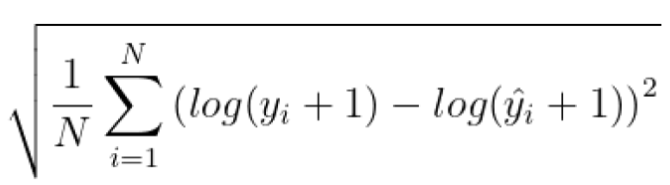

  
- 양수로 만들기 위해 +1 해줌 중요하진 않음 / -inf값을 가지지 않도록 이를 방지 
- 일반적으로 우수한 평가지표 / 무슨 지표쓸지 잘 모르겠다 -> rmsle 사용하면됨 / 일반적으로 많이 사용함 / 타겟값 범위 커지면 값 커질 수 밖에 없음 / 타겟 값 범위 따라서 달라짐 / 어느정도 값이면 rsmle가 좋은가는 확정할 수 없음 / 경우 따라 다름 

In [18]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

#### **<font color='orange'> 마지막에 지수변환해 count로 복원</font>**

## 6.4.3 모델 훈련
- 모델 생성 후 훈련
 - 가장 간단한 선형 회귀 모델인 LinearRegression 활용
#### **<font color='orange'> 타깃값을 count가 아닌 log(count)로 변환해 사용</font>**
 - fit( )은 사이킷런의 모델 훈련 메서드
 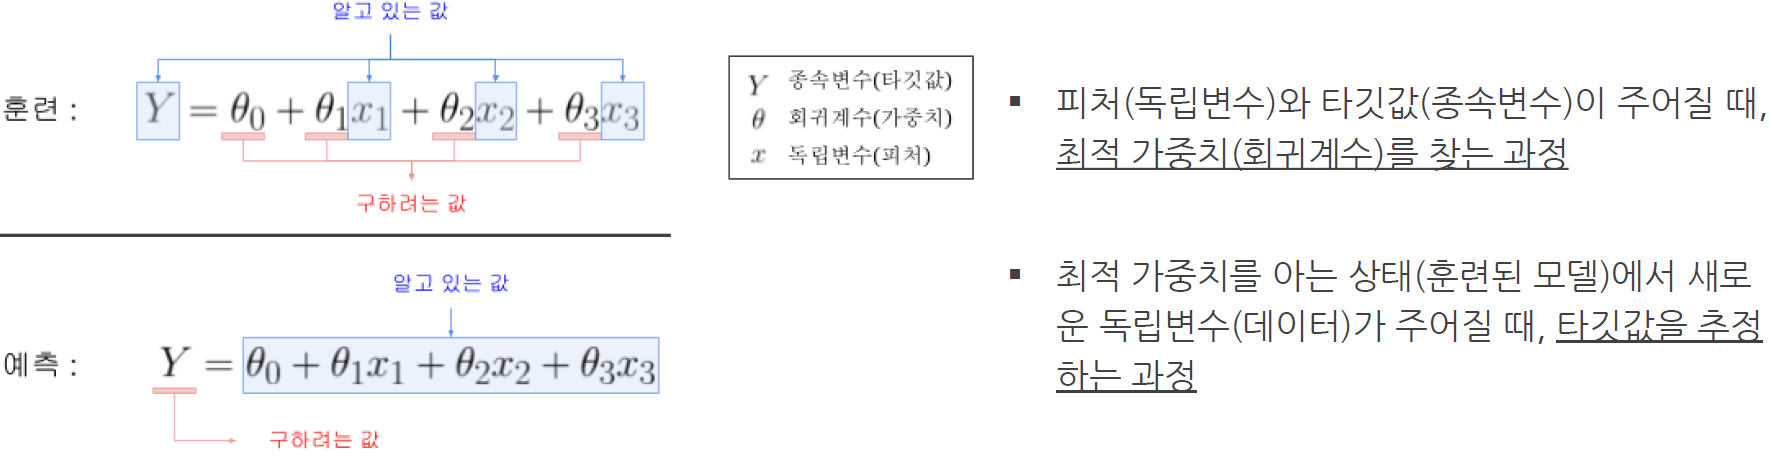
- 탐색적 데이터 분석 : 예측에 도움될 피처를 추리고, 적절한 모델링 방법을 탐색하는 과정
- 피처 엔지니어링 : 추려진 피처를 훈련에 적합하도록, 성능 향상에 도움되도록 가공하는 과정

In [19]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [20]:
log_y = np.log(y)  # 타깃값 로그변환
linear_reg_model.fit(X_train, log_y) # 모델 훈련

LinearRegression()

## 6.4.4 모델 성능 검증

- 훈련된 모델로 예측 수행
 - 모델 훈련 – 결과 예측 – RMSLE 도출을 위해 시험 삼아 짠 코드
 - 원래는 훈련 시 훈련 데이터를, 검증 시 검증 데이터를, 테스트 시 테스트 데이터를 사용해야 함

In [21]:
preds = linear_reg_model.predict(X_train)

- 예측이 잘 되었는지 RMSLE 계산

In [22]:
print (f'선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형회귀의 RMSLE 값 : 1.0205


- rmsle( ) 함수의 세 번째 인수로 True를 전달했으므로 지수변환을 적용함
- 단순 선형 회귀 모델의 RMSLE 값은 1.02 / 좋은 수치는 아님 / 베이스라인 모델이었기 때문 , 간단한 수준 / 이 경우에는 0.1정도여야 좋음 


## 6.4.5 예측 및 결과 제출
- 베이스라인 모델로 예측한 결과 제출
 - to_csv( )는 DataFrame을 csv 파일로 저장하는 함수(index=False로 설정해야 인덱스를 제외하고 저장)

In [23]:
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [24]:
linearreg_preds = linear_reg_model.predict(X_test) # 테스트 데이터로 예측

submission['count'] = np.exp(linearreg_preds)    # 지수변환
submission.to_csv('submission.csv', index=False) # 파일로 저장

In [25]:
submission

,datetime,count
0,2011-01-20 00:00:00,11.362398
1,2011-01-20 01:00:00,13.601789
2,2011-01-20 02:00:00,15.084417
3,2011-01-20 03:00:00,16.308758
4,2011-01-20 04:00:00,18.086453
...,...,...
6488,2012-12-31 19:00:00,114.076538
6489,2012-12-31 20:00:00,126.511160
6490,2012-12-31 21:00:00,140.114463
6491,2012-12-31 22:00:00,169.345347


- 2,773등 (상위 85.5%)